# <center>Lab Two Classification</center>
<center><font size = "4"> Australian Weather Station Collection Data 2007-2017</font></center>

##### <center>Create by An Nguyen, Andy Ho, Jodi Pafford</center>
<center> March 8, 2019</center>

# Total Points

# Data Preparation 1
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis

In [17]:
import pandas as pd
import numpy as np

##Load original dataset.  No longer needed.
##The cleaning process is very computationally expensive therefore a the 'ranifall.csv' file was created for later use. 
#rainfall_original = pd.read_csv('weatherAus.csv') 

#Functions to find the average value using the bracketing values around the NaN's.  
    #For instance if a city's 'MinTemp' has 34, 32, NaN, NaN, 55 recorded 
    #the function will average 32 and 55 for the first NaN: (32+55)/2 = 43.5 
    #and average the above value and 55 for the second NaN: (43.5+55)/2 = 49.25
#Will only use values if they are from the same city.
#If NaN is the earliest timepoint for a given city the next timepoint with no NaN will be given instead of the mean.
#If NaN is the latest timepoint for a given city the previous timepoint with no NaN will be given instead of the mean.

def impute_by_city(cities,variables):
    for c in cities:
        #aPrse out observations from a single city.
        temp = rainfall[rainfall.Location == c]
        
        #Interate through all observations of the temp data file.
        i = min(temp.index)
        while i <= max(temp.index):
            for v in variables:
                #Check to see if there are values recorded for the variable, will pass over if all are NaN.
                if pd.isna(temp[v]).all():
                    pass
                
                #Check to see if a single value is NaN.
                elif pd.isna(temp[v][i]):
                    #Find the mean of bracketing values and impute into main dataframe.
                    temp[v][i] = find_mean(temp[v], i)
                    rainfall[v][i] = temp[v][i]
            i = i + 1       

#Find mean of bracketing values.
def find_mean(templist, index):
    #If NaN is earliest timepoint for the city take the next value that is not NaN.
    if index == min(templist.index): 
        return find_top(templist, index)
    
    #If latest timepoint for the city take the previous value that is not NaN.
    elif index == max(templist.index): 
        return find_bottom(templist, index)
    
    else:
        #Find previous non-NaN value.
        bottom = find_bottom(templist, index) 
        #Find next non-NaN value.
        top = find_top(templist, index) 
        
    #If current value is not from the latest timepoint for the city but there are no more non-NaN value recorded
    #after this value then the previous non-NaN value will be taken.
    if pd.isna(top): 
        return bottom
    

    else:
        mean = (top + bottom)/2
        return mean

#Find previous non-NaN value.
def find_bottom(templist, index):
    while pd.isna(templist[index-1]):
        index = index-1
    bottom = templist[index-1]
    return bottom

#Find next non-NaN value.
#If there are no more non-NaN values return the previous non-NaN value.
def find_top(templist, index):
    while pd.isna(templist[index+1]):
        index = index+1
        if index == max(templist.index):
            top = np.nan
            return top
    top = templist[index+1]
    return top   

In [18]:
##Code for first run data cleaning, no longer needed after 'rainfall.csv' was created at the end of cleaning process.

#rainfall = rainfall_original.copy()

##'RISK_MM' was used by creator of dataset to extrapolate response variable, 'RainTomorrow.'  Needs to be dropped to not 
##influence prediction.
#rainfall.drop(["RISK_MM"], axis=1, inplace=True)

##Drop any observation with no record of rainfall for the day.  Cannot be imputed.
#rainfall.dropna(subset=["RainToday"], inplace=True)

#Reset the Index of each observation to match it's iloc, get rid of gaps between Index integers.
#rainfall = rainfall.reset_index(drop=True)
#rainfall.info()

In [19]:
##can be skipped if rainfall.csv already generated!

##set the cardinal directions to degrees.
#directions = {'N':0, 'NNE':22.5, 'NE':45, 'NE':45, 'ENE':67.5, 'E':90, 'ESE':112.5, 'SE':135, 'SSE':157.5, 'S':180,\
#              'SSW':202.5, 'SW':225, 'WSW':247.5, 'W':270, 'WNW':292.5, 'NW':315, 'NNW':337.5}

##Replace cardianl direction to their corresponding degrees.
#rainfall = rainfall.replace(directions) 

#Get name of all cities in the data frame.
#cities = rainfall.Location.unique() 

#c_variables = []
#d_variables = []

##change 'Yes' and 'No' to 1 and 0 respectively.
#rainfall.RainToday = rainfall.RainToday=='Yes'
#rainfall.RainToday = rainfall.RainToday.astype(np.int)
#rainfall.RainTomorrow = rainfall.RainTomorrow=='Yes'
#rainfall.RainTomorrow = rainfall.RainTomorrow.astype(np.int)

##Find all variables with continous data type.
#for l in list(rainfall):
#    if (rainfall[l].dtypes == 'float64'):
#        c_variables.append(l)
#    else:
#        d_variables.append(l)

In [20]:
##can be skipped if rainfall.csv already generated! Very expensive, 'rainfall.csv' can be uploaded from working directory

##Impute values to NaN's and save to csv file for later use.
#impute_by_city(cities, c_variables)
#rainfall.to_csv("rainfall.csv", sep=',', index=True)

In [21]:
##load pre-generated rainfall.csv file.
rainfall = pd.read_csv('rainfall.csv', index_col=0) 

#Variables 'Evaporation' and 'Sunshine' contained many missing values, too many to be imputed.
rainfall = rainfall.drop(['Evaporation', 'Sunshine'], axis = 1)

#Get name of all cities in the data frame.
l = list(rainfall.Location.unique())

#Drop all observations with NaN's.  These are values that could not be imputed using the above code.
rainfall.dropna(subset = list(rainfall), inplace = True)

#List all cities that were dropped
for i in l:
    if i not in rainfall.Location.unique():
        print(i)
        
#'Date' and 'Location' variables not needed for prediction. 
rainfall = rainfall.drop(['Date', 'Location'], axis = 1) 

BadgerysCreek
Newcastle
NorahHead
Penrith
Tuggeranong
MountGinini
Nhil
Dartmoor
GoldCoast
Adelaide
Albany
Witchcliffe
SalmonGums
Walpole


# Data Preparation 2
Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

# Modeling and Evaluation 1
Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

We chose to use the F1 calculation as our evaluation metrics. The F1 measure is the weighted average of Precision and Recall. The dataset we are using is not senstive to False Positive like that of a medical study and therefore it is not as important to use Precision and Recall alone. Accuracy is not the best choice when the classes are not close to equal in sizes and therefore not a good fit for this dataset. Class size is demonstrated below. F1 Calculation, 2*(Recall * Precision)/(Recall + Precision), will be used as our evaluation metric of choice.

RainTomorrow
0    79872
1    21456
dtype: int64


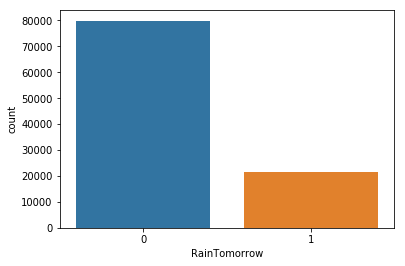

In [22]:
#View size of classes to justify not using accuracy
import seaborn as sns
import matplotlib.pyplot as plt
print(rainfall.groupby('RainTomorrow').size())
sns.countplot(rainfall['RainTomorrow'], label="Count")
plt.show()

# Modeling and Evaluation 2
Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. 

We chose to divide our data into training and testing splits by using Shuffle Split. By choosing a cross-validation that is not stratified, we are ensuring that the training set never becomes part of the testing set and vice-versa. Additionally, the size of our dataset does not warrant the use of multiple splits for improved accuracy. For this same reason, we chose to only calculate 1 iteration of the split.

In [23]:
from sklearn.model_selection import ShuffleSplit as ss
   
#Split our data into training and testing sets, 80% of data will be in the training set and 20% the testing set.
#Data will be process this way 5 times, value can be change per user's judgement.  It is recommended that number
#of iterations be at least 2 so that standard deviations can be computed.
num_cv_iterations = 1
cv_object = ss(n_splits=num_cv_iterations, test_size  = 0.2)

# Modeling and Evaluation 3
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

* Task 1 Classification: Predict if it will rain the next day or not.
* Task 2 Regression: Compute how much it rained that day.

## Task 1 Classification:  Predit if it will rain the next day or not.

F1 Measure of KNN with 1 neighbors with 'uniform' weights is: 0.54322
Time to Run: 30.74397921562195
F1 Measure of KNN with 2 neighbors with 'uniform' weights is: 0.46945
Time to Run: 34.2933406829834
F1 Measure of KNN with 3 neighbors with 'uniform' weights is: 0.56973
Time to Run: 39.112505197525024
F1 Measure of KNN with 4 neighbors with 'uniform' weights is: 0.52481
Time to Run: 40.101985931396484
F1 Measure of KNN with 5 neighbors with 'uniform' weights is: 0.58092
Time to Run: 41.623209714889526
F1 Measure of KNN with 6 neighbors with 'uniform' weights is: 0.53695
Time to Run: 44.40526556968689
F1 Measure of KNN with 7 neighbors with 'uniform' weights is: 0.58146
Time to Run: 47.467609167099
F1 Measure of KNN with 8 neighbors with 'uniform' weights is: 0.54961
Time to Run: 44.753456592559814
F1 Measure of KNN with 9 neighbors with 'uniform' weights is: 0.57915
Time to Run: 48.07119870185852
F1 Measure of KNN with 10 neighbors with 'uniform' weights is: 0.55527
Time to Run: 51.070

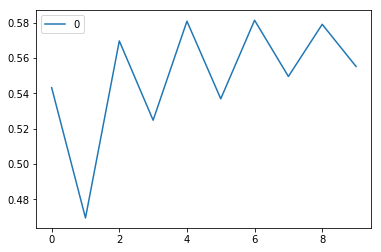

The number of neighbors with the highest F1 score is 7, F1 of 0.58146.

F1 Measure of KNN with 1 neighbors with 'distance' weights is: 0.54322
Time to Run: 30.613192319869995
F1 Measure of KNN with 2 neighbors with 'distance' weights is: 0.54322
Time to Run: 33.79134917259216
F1 Measure of KNN with 3 neighbors with 'distance' weights is: 0.57147
Time to Run: 39.44379281997681
F1 Measure of KNN with 4 neighbors with 'distance' weights is: 0.57911
Time to Run: 39.74287962913513
F1 Measure of KNN with 5 neighbors with 'distance' weights is: 0.58343
Time to Run: 49.03789234161377
F1 Measure of KNN with 6 neighbors with 'distance' weights is: 0.58549
Time to Run: 44.907217502593994
F1 Measure of KNN with 7 neighbors with 'distance' weights is: 0.58491
Time to Run: 45.871933937072754
F1 Measure of KNN with 8 neighbors with 'distance' weights is: 0.58496
Time to Run: 46.57476449012756
F1 Measure of KNN with 9 neighbors with 'distance' weights is: 0.58118
Time to Run: 47.809305906295776
F1 Mea

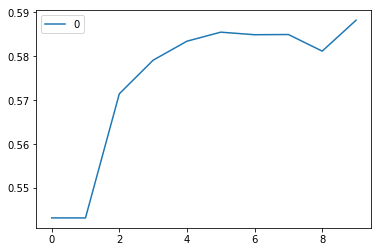

The number of neighbors with the highest F1 score is 10, F1 of 0.58820.

F1 Measure of Gausian Naive Bayes is: 0.58320
Time to Run: 0.09324812889099121

F1 Measure of Logistic Regression 'l1' penalty with cost 1 is: 0.59699
Time to Run: 1.3550684452056885
F1 Measure of Logistic Regression 'l1' penalty with cost 2 is: 0.59699
Time to Run: 1.3957383632659912
F1 Measure of Logistic Regression 'l1' penalty with cost 3 is: 0.59690
Time to Run: 1.5395796298980713
F1 Measure of Logistic Regression 'l1' penalty with cost 4 is: 0.59690
Time to Run: 1.5227172374725342
F1 Measure of Logistic Regression 'l1' penalty with cost 5 is: 0.59682
Time to Run: 1.5336263179779053
F1 Measure of Logistic Regression 'l1' penalty with cost 6 is: 0.59682
Time to Run: 1.568843126296997
F1 Measure of Logistic Regression 'l1' penalty with cost 7 is: 0.59682
Time to Run: 1.6591157913208008
F1 Measure of Logistic Regression 'l1' penalty with cost 8 is: 0.59674
Time to Run: 1.5371007919311523
F1 Measure of Logistic R

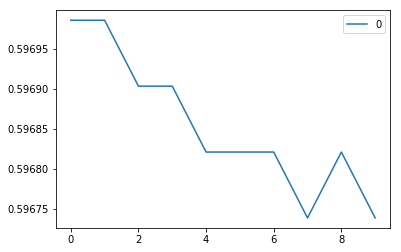

The cost with the highest F1 score is 1, F1 of 0.59699.

F1 Measure of Logistic Regression 'l2' penalty with cost 1 is: 0.59699
Time to Run: 0.975628137588501
F1 Measure of Logistic Regression 'l2' penalty with cost 2 is: 0.59682
Time to Run: 0.9458694458007812
F1 Measure of Logistic Regression 'l2' penalty with cost 3 is: 0.59682
Time to Run: 0.8660147190093994
F1 Measure of Logistic Regression 'l2' penalty with cost 4 is: 0.59682
Time to Run: 0.8471648693084717
F1 Measure of Logistic Regression 'l2' penalty with cost 5 is: 0.59682
Time to Run: 0.8694851398468018
F1 Measure of Logistic Regression 'l2' penalty with cost 6 is: 0.59682
Time to Run: 0.884861946105957
F1 Measure of Logistic Regression 'l2' penalty with cost 7 is: 0.59682
Time to Run: 0.8952803611755371
F1 Measure of Logistic Regression 'l2' penalty with cost 8 is: 0.59682
Time to Run: 0.8674983978271484
F1 Measure of Logistic Regression 'l2' penalty with cost 9 is: 0.59682
Time to Run: 0.8650228977203369
F1 Measure of Logi

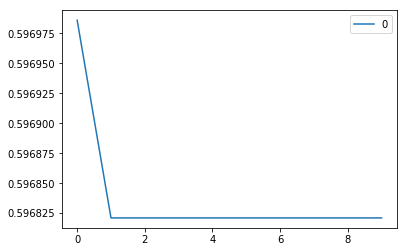

The cost with the highest F1 score is 1, F1 of 0.59699.



In [24]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler as sts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
import time

#Assign values to response variable, y, and explanatory variables, x.
temp_rainfall = rainfall.copy()
if 'RainTomorrow' in temp_rainfall:
    #Response variable is 'RainTomorrow'
    y = temp_rainfall['RainTomorrow'].values
    
    #Remove response variable from dataframe
    del temp_rainfall['RainTomorrow']
    
    #Everything else is the explanatory variables used in prediction.
    x = temp_rainfall.values
    
scl_obj = sts()

#Split the data into training and testing set 5 different ways, iterate through each way.
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(x,y)):
    
    #Standardize the explanatory variables of the training and testing sets' means to be around 0 with a standard deviation of 1.  
    #Each value is subtracted from the mean and divided by the standard deviation of the whole dataset.
    scl_obj.fit(x[train_indices])
    X_train_scaled = scl_obj.transform(x[train_indices])
    X_test_scaled = scl_obj.transform(x[test_indices])

    #K Nearest Neighbors, all neighbors are treated the same.  Number of neighbors range from 1 to 10.
    F1_values = []
    for K in range(1, 11):
        t0=time.time()
        knn_clf = knnc(n_neighbors=K, weights='uniform')
        knn_clf.fit(X_train_scaled,y[train_indices])
        y_hat = knn_clf.predict(X_test_scaled)
        F1 = mt.f1_score(y[test_indices],y_hat)
        F1_values.append(F1)
        print('F1 Measure of KNN with %d neighbors with \'uniform\' weights is: %.5f'%(K,F1))
        print ("Time to Run:", time.time()-t0)
    #plotting the F1 scores against k values
    curve = pd.DataFrame(F1_values) #elbow curve 
    plt.show(curve.plot())
    print('The number of neighbors with the highest F1 score is %d, F1 of %.5f.' %(F1_values.index(max(F1_values))+1,max(F1_values)))
    print()
        
    #K Nearest Neighbors, closer neighbors are given more weight.  Number of neighbors range from 1 to 10.
    F1_values = []
    for K in range(1, 11):
        t0=time.time()
        knn_clf = knnc(n_neighbors=K, weights='distance')
        knn_clf.fit(X_train_scaled,y[train_indices])
        y_hat = knn_clf.predict(X_test_scaled)
        F1 = mt.f1_score(y[test_indices],y_hat)
        F1_values.append(F1)
        print('F1 Measure of KNN with %d neighbors with \'distance\' weights is: %.5f'%(K,F1))
        print ("Time to Run:", time.time()-t0)
    #plotting the F1 scores against k values
    curve = pd.DataFrame(F1_values) #elbow curve 
    plt.show(curve.plot())
    print('The number of neighbors with the highest F1 score is %d, F1 of %.5f.' %(F1_values.index(max(F1_values))+1,max(F1_values)))
    print()
           
    #Gaussian Naive Bayes
    t0=time.time()
    gnb_clf = gnb()
    gnb_clf.fit(X_train_scaled,y[train_indices])
    y_hat = gnb_clf.predict(X_test_scaled)
    F1 = mt.f1_score(y[test_indices],y_hat)
    print('F1 Measure of Gausian Naive Bayes is: %.5f' %(F1))
    print ("Time to Run:", time.time()-t0)
    print()
    
    
    #Perform Logistic Regression, cost (inverse of regulation strength) range from 1 to 10 and l1 penalty.
    F1_values = []
    for cost in range(1,11):
        t0=time.time()
        lr_clf = lr(penalty='l1', C=cost)
        lr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = lr_clf.predict(X_test_scaled)
        F1 = mt.f1_score(y[test_indices],y_hat)
        F1_values.append(F1)
        print('F1 Measure of Logistic Regression \'l1\' penalty with cost %d is: %.5f' %(cost, F1))
        print ("Time to Run:", time.time()-t0)
    #plotting the F1 scores against cost values
    curve = pd.DataFrame(F1_values) #elbow curve 
    plt.show(curve.plot())
    print('The cost with the highest F1 score is %d, F1 of %.5f.' %(F1_values.index(max(F1_values))+1,max(F1_values)))
    print()
    
    #Perform Logistic Regression, cost (inverse of regulation strength) range from 1 to 10 and l2 penalty.
    F1_values = []
    for cost in range(1,11):
        t0=time.time()
        lr_clf = lr(penalty='l2', C=cost)
        lr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = lr_clf.predict(X_test_scaled)
        F1 = mt.f1_score(y[test_indices],y_hat)
        F1_values.append(F1)
        print('F1 Measure of Logistic Regression \'l2\' penalty with cost %d is: %.5f' %(cost, F1))
        print ("Time to Run:", time.time()-t0)
    #plotting the F1 scores against cost values
    curve = pd.DataFrame(F1_values) #elbow curve 
    plt.show(curve.plot())
    print('The cost with the highest F1 score is %d, F1 of %.5f.' %(F1_values.index(max(F1_values))+1,max(F1_values)))
    print()

## Task 2 Regression: Compute how much it rained that day.

RMSE of KNN with 1 neighbors with 'uniform' weights is: 9.28316
Time to Run: 20.86074995994568
RMSE of KNN with 2 neighbors with 'uniform' weights is: 8.34581
Time to Run: 26.164385557174683
RMSE of KNN with 3 neighbors with 'uniform' weights is: 7.95210
Time to Run: 29.564488649368286
RMSE of KNN with 4 neighbors with 'uniform' weights is: 7.75602
Time to Run: 32.373332262039185
RMSE of KNN with 5 neighbors with 'uniform' weights is: 7.58028
Time to Run: 34.06518363952637
RMSE of KNN with 6 neighbors with 'uniform' weights is: 7.49589
Time to Run: 35.936588287353516
RMSE of KNN with 7 neighbors with 'uniform' weights is: 7.45164
Time to Run: 37.00942921638489
RMSE of KNN with 8 neighbors with 'uniform' weights is: 7.40705
Time to Run: 37.508439779281616
RMSE of KNN with 9 neighbors with 'uniform' weights is: 7.40126
Time to Run: 38.26328206062317
RMSE of KNN with 10 neighbors with 'uniform' weights is: 7.39956
Time to Run: 40.75471806526184
RMSE of KNN with 11 neighbors with 'uniform'

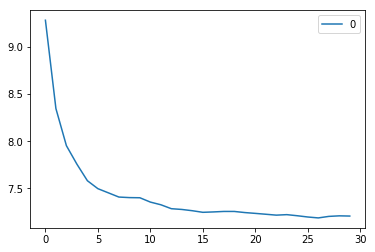

The number of neighbors with the lowest RMSE is 27, RMSE of 7.18566.

RMSE of KNN with 1 neighbors with 'distance' weights is: 9.28316
Time to Run: 20.672232389450073
RMSE of KNN with 2 neighbors with 'distance' weights is: 8.32894
Time to Run: 22.493037939071655
RMSE of KNN with 3 neighbors with 'distance' weights is: 7.93951
Time to Run: 25.41797113418579
RMSE of KNN with 4 neighbors with 'distance' weights is: 7.74089
Time to Run: 30.228111505508423
RMSE of KNN with 5 neighbors with 'distance' weights is: 7.57051
Time to Run: 30.365530729293823
RMSE of KNN with 6 neighbors with 'distance' weights is: 7.48292
Time to Run: 34.302271127700806
RMSE of KNN with 7 neighbors with 'distance' weights is: 7.43648
Time to Run: 36.12159323692322
RMSE of KNN with 8 neighbors with 'distance' weights is: 7.39133
Time to Run: 33.73931264877319
RMSE of KNN with 9 neighbors with 'distance' weights is: 7.38336
Time to Run: 34.85382151603699
RMSE of KNN with 10 neighbors with 'distance' weights is: 7.3

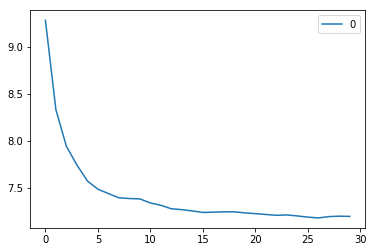

The number of neighbors with the lowest RMSE is 27, RMSE of 7.17679.

RMSE of Decision Tree with 2 depth is: 7.80590
Time to Run: 0.15475034713745117
RMSE of Decision Tree with 3 depth is: 7.63003
Time to Run: 0.1870412826538086
RMSE of Decision Tree with 4 depth is: 7.49708
Time to Run: 0.2474527359008789
RMSE of Decision Tree with 5 depth is: 7.42024
Time to Run: 0.26588916778564453
RMSE of Decision Tree with 6 depth is: 7.33868
Time to Run: 0.4196162223815918
RMSE of Decision Tree with 7 depth is: 7.23903
Time to Run: 0.4419400691986084
RMSE of Decision Tree with 8 depth is: 7.26556
Time to Run: 0.5401034355163574
RMSE of Decision Tree with 9 depth is: 7.31521
Time to Run: 0.570892333984375


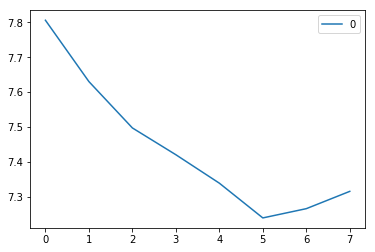

The depth with the lowest RMSE is 6, RMSE of 7.23903.

RMSE of Support Vector Regression with epsilon = 0.1 is: 7.81050
Time to Run: 1678.5393884181976
RMSE of Support Vector Regression with epsilon = 0.2 is: 7.80735
Time to Run: 1036.1139750480652
RMSE of Support Vector Regression with epsilon = 0.3 is: 7.80658
Time to Run: 387.66610193252563
RMSE of Support Vector Regression with epsilon = 0.4 is: 7.80217
Time to Run: 236.10371851921082
RMSE of Support Vector Regression with epsilon = 0.5 is: 7.80091
Time to Run: 150.24399542808533
RMSE of Support Vector Regression with epsilon = 0.6 is: 7.79667
Time to Run: 107.62523365020752
RMSE of Support Vector Regression with epsilon = 0.7 is: 7.79210
Time to Run: 101.33346629142761
RMSE of Support Vector Regression with epsilon = 0.8 is: 7.78945
Time to Run: 85.80779314041138
RMSE of Support Vector Regression with epsilon = 0.9 is: 7.78821
Time to Run: 83.42554306983948


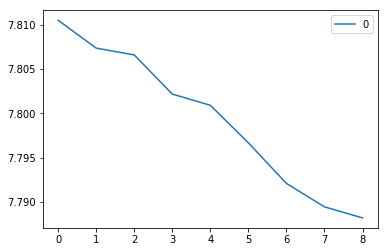

The depth with the lowest RMSE is 9, RMSE of 7.78821.



In [25]:
from sklearn.neighbors import KNeighborsRegressor as knnr
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.svm import SVR

if 'Rainfall' in temp_rainfall:
    #Response variable is 'RainTomorrow'
    y = temp_rainfall['Rainfall'].values
    
    #Remove response variable from dataframe
    del temp_rainfall['Rainfall']
    
    #Everything else is the explanatory variables used in prediction.
    x = temp_rainfall.values
    
scl_obj = sts()

#Split the data into training and testing set 5 different ways, iterate through each way.
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(x,y)):
    
    #Standardize the explanatory variables of the training and testing sets' means to be around 0 with a standard deviation of 1.  
    #Each value is subtracted from the mean and divided by the standard deviation of the whole dataset.
    scl_obj.fit(x[train_indices])
    X_train_scaled = scl_obj.transform(x[train_indices])
    X_test_scaled = scl_obj.transform(x[test_indices])
    
    rmse_val = []
    for K in range(1,31):
        t0=time.time()
        knnr_clf = knnr(n_neighbors=K, weights='uniform')
        knnr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = knnr_clf.predict(X_test_scaled)
        error = np.sqrt(mse(y[test_indices],y_hat))
        rmse_val.append(error)
        print('RMSE of KNN with %d neighbors with \'uniform\' weights is: %.5f'%(K,error))
        print ("Time to Run:", time.time()-t0)
    #plotting the rmse values against k values
    curve = pd.DataFrame(rmse_val) #elbow curve 
    plt.show(curve.plot())
    print('The number of neighbors with the lowest RMSE is %d, RMSE of %.5f.' %(rmse_val.index(min(rmse_val))+1,min(rmse_val)))
    print()
    
    rmse_val = []
    for K in range(1,31):
        t0=time.time()
        knnr_clf = knnr(n_neighbors=K, weights='distance')
        knnr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = knnr_clf.predict(X_test_scaled)
        error = np.sqrt(mse(y[test_indices],y_hat))
        rmse_val.append(error)
        print('RMSE of KNN with %d neighbors with \'distance\' weights is: %.5f'%(K,error))
        print ("Time to Run:", time.time()-t0)
    #plotting the rmse values against k values
    curve = pd.DataFrame(rmse_val) #elbow curve 
    plt.show(curve.plot())
    print('The number of neighbors with the lowest RMSE is %d, RMSE of %.5f.' %(rmse_val.index(min(rmse_val))+1,min(rmse_val)))
    print()
    
    rmse_val = []
    for K in range(2,10):
        t0=time.time()
        dtr_clf = dtr(max_depth = K)
        dtr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = dtr_clf.predict(X_test_scaled)        
        error = np.sqrt(mse(y[test_indices],y_hat))
        rmse_val.append(error)
        print('RMSE of Decision Tree with %d depth is: %.5f'%(K,error))
        print ("Time to Run:", time.time()-t0)
    #plotting the rmse values against k values
    curve = pd.DataFrame(rmse_val) #elbow curve 
    plt.show(curve.plot())
    print('The depth with the lowest RMSE is %d, RMSE of %.5f.' %(rmse_val.index(min(rmse_val))+1,min(rmse_val)))
    print()

    rmse_val = []
    for e in np.arange(.1,1,.1):
        t0=time.time()
        svr_clf = SVR(epsilon=e)
        svr_clf.fit(X_train_scaled,y[train_indices])
        y_hat = svr_clf.predict(X_test_scaled)
        error = np.sqrt(mse(y[test_indices],y_hat))
        rmse_val.append(error)
        print('RMSE of Support Vector Regression with epsilon = %.1f is: %.5f'%(e,error))
        print ("Time to Run:", time.time()-t0)
    #plotting the rmse values against k values
    curve = pd.DataFrame(rmse_val) #elbow curve 
    plt.show(curve.plot())
    print('The depth with the lowest RMSE is %d, RMSE of %.5f.' %(rmse_val.index(min(rmse_val))+1,min(rmse_val)))
    print()

# Modeling and Evaluation 4
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model. 

## Task 1 Classification:  Predit if it will rain the next day or not.

Logistic regression with a low cost results in the best F1 score, 59.7%.  Predicting rain for the next day with atmospheric data from the present day using the dataset downloaded is best done with logistic regression if maximizing F1 is the only criteria.  If we consider computational expenses using an 'l2', ~0.9 seconds, penalty is cheaper than the 'l1' penalty, ~1.7 seconds.  Furthermore, the Gaussian Naive Bayes Classification model took 0.09 seconds to run while giving up a little more than 1% predicting power, 58.3% F1 score.  Therefore, it is our recomendation to use the Gaussian Naive Bayes Classification model for this case study.


In [27]:
temp_rainfall = rainfall.copy()
if 'RainTomorrow' in temp_rainfall:
    #Response variable is 'RainTomorrow'
    y = temp_rainfall['RainTomorrow'].values
    
    #Remove response variable from dataframe
    del temp_rainfall['RainTomorrow']
    
    #Everything else is the explanatory variables used in prediction.
    x = temp_rainfall.values

cv_object.split(x,y)

scl_obj.fit(x[train_indices])
X_train_scaled = scl_obj.transform(x[train_indices])
X_test_scaled = scl_obj.transform(x[test_indices])

gnb_clf = gnb()
gnb_clf.fit(X_train_scaled,y[train_indices])
y_hat = gnb_clf.predict(X_test_scaled)
F1 = mt.f1_score(y[test_indices],y_hat)
conf = mt.confusion_matrix(y[test_indices],y_hat)
print("Confusion matrix")
print(conf)
print('F1 Measure of Gausian Naive Bayes is: %.5f' %(F1))


Confusion matrix
[[14119  1829]
 [ 1762  2556]]
F1 Measure of Gausian Naive Bayes is: 0.58738


## Task 2 Regression: Compute how much it rained that day.


# Modeling and Evaluation 5
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

# Modeling and Evaluation 6
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task. 

# Deployment
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

# Exceptional Work
You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm